题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...
问题
1. # 网络图可视化
plt.figure(figsize=(14, 12), facecolor='lightgray')
pos = nx.spring_layout(G, k=0.5)  # 调整 k 参数以改变节点之间的距离

# 根据边的权重绘制边
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='grey',
                         width=[G[u][v]['weight'] / 2 for u, v in G.edges()])

# 绘制节点
node_size = [G.degree(user) * 100 for user in G.nodes()]  # 节点大小与度数相关
node_color = [G.nodes[user]['score'] for user in G.nodes()]  # 节点颜色与影响力分数相关

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis, alpha=0.7)

# 添加节点标签
labels = {user: user for user in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black', font_family='sans-serif', font_weight='bold')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm._A = []  # 添加一个空的数组，避免警告
cbar = plt.colorbar(sm, ax=plt.gca(), label='影响力得分')  # 指定 ax 参数
cbar.ax.tick_params(labelsize=10)  # 设置颜色条刻度字体大小

# 添加标题
plt.title("社交网络图", fontsize=18, fontweight='bold')
plt.axis('off')  # 关闭坐标轴
plt.show()社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。
2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量
4. a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。的50%）。
3. 推荐新朋友

邻接矩阵：
[0.0, 5.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0]
[5.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 2.0, 1.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 0.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0

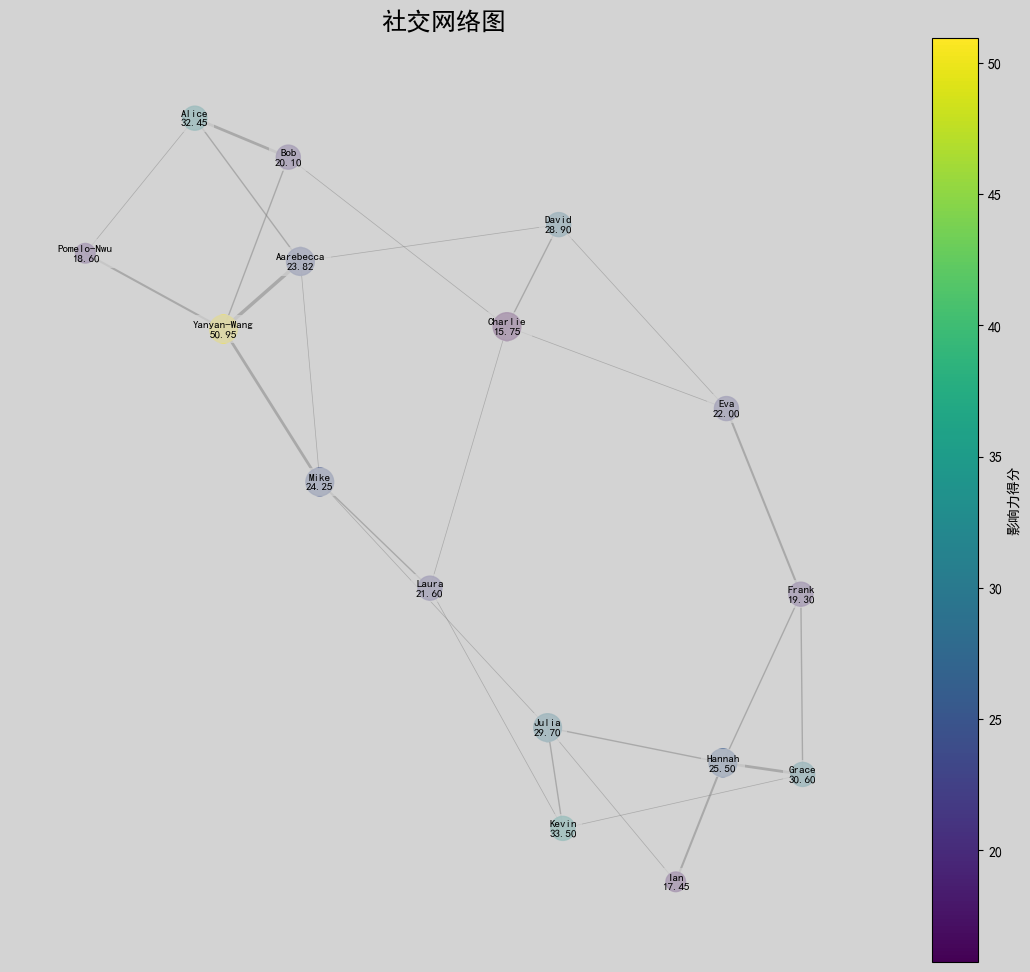

In [51]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建示例数据
data = {
    "nodes": [
        ["Yanyan-Wang", 50.95],
        ["Aarebecca", 23.82],
        ["Pomelo-Nwu", 18.60],
        ["Alice", 32.45],
        ["Bob", 20.10],
        ["Charlie", 15.75],
        ["David", 28.90],
        ["Eva", 22.00],
        ["Frank", 19.30],
        ["Grace", 30.60],
        ["Hannah", 25.50],
        ["Ian", 17.45],
        ["Julia", 29.70],
        ["Kevin", 33.50],
        ["Laura", 21.60],
        ["Mike", 24.25]
    ],
    "edges": [
        ["Yanyan-Wang", "Aarebecca", 5.0],
        ["Yanyan-Wang", "Pomelo-Nwu", 3.0],
        ["Aarebecca", "Alice", 2.0],
        ["Alice", "Bob", 4.0],
        ["Bob", "Charlie", 1.0],
        ["Charlie", "David", 2.0],
        ["David", "Eva", 1.0],
        ["Eva", "Frank", 3.0],
        ["Frank", "Grace", 2.0],
        ["Grace", "Hannah", 4.0],
        ["Hannah", "Ian", 3.0],
        ["Ian", "Julia", 1.0],
        ["Julia", "Kevin", 2.0],
        ["Kevin", "Laura", 1.0],
        ["Laura", "Mike", 2.0],
        ["Mike", "Yanyan-Wang", 4.0],
        ["Yanyan-Wang", "Bob", 2.0],
        ["Pomelo-Nwu", "Alice", 1.0],
        ["Aarebecca", "David", 1.0],
        ["Charlie", "Eva", 1.0],
        ["Grace", "Kevin", 1.0],
        ["Julia", "Hannah", 2.0],
        ["Mike", "Julia", 1.0],  # 新增边
        ["Laura", "Charlie", 1.0],  # 新增边
        ["Hannah", "Frank", 2.0],  # 新增边
        ["Aarebecca", "Mike", 1.0]  # 新增边
    ]
}

# 用户节点和边关系
nodes = data['nodes']
edges = data['edges']

# 创建邻接图
G = nx.Graph()
for user, score in nodes:
    G.add_node(user, score=score)

for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)

# 打印邻接矩阵
adj_matrix = nx.to_numpy_array(G)
print("邻接矩阵：")
for row in adj_matrix.tolist():
    print(row)
# 每个用户的直接朋友
direct_friends = {user: list(G.neighbors(user)) for user in G.nodes()}
print("每个用户的直接朋友：")
for user, friends in direct_friends.items():
    print(f"{user}: {', '.join(friends)}")

# 统计与度中心性分析
degree = {user: G.degree(user) for user in G.nodes()}
top_5_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n度数最多的前5个用户及其朋友数量：")
for user, count in top_5_degree:
    print(f"{user}: {count}个朋友")

influence_scores = {user: G.nodes[user]['score'] for user in G.nodes()}
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力最高的前5个用户：")
for user, score in top_5_influence:
    print(f"{user}: 影响力得分 {score}")

# 综合考虑影响力分数和朋友数量
combined_score = {
    user: (influence_scores[user] * 0.5 + degree[user] * 0.5) for user in G.nodes()
}
top_influential_users = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n对社交网络最有影响力的用户：")
for user, score in top_influential_users:
    print(f"{user}: 综合影响力得分 {score}")

# 推荐新朋友
target_user = "Yanyan-Wang"
friends_of_friends = set()

for friend in G.neighbors(target_user):
    friends_of_friends.update(G.neighbors(friend))

# 排除已是朋友的用户
friends_of_friends.discard(target_user)
direct_friends_set = set(G.neighbors(target_user))
recommendations = {user: len(direct_friends_set.intersection(G.neighbors(user))) for user in friends_of_friends}

# 找到推荐的用户
top_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
print("\n推荐的新朋友：")
for user, count in top_recommendations:
    print(f"{user}: {count}个共同朋友")

# 连接强度分析
connection_strength = {user: G[target_user][user]['weight'] for user in G.neighbors(target_user)}
top_strength = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n与 Yanyan-Wang 连接强度最高的5个用户：")
for user, strength in top_strength:
    print(f"{user}: 连接强度 {strength}")

# 网络图可视化
plt.figure(figsize=(14, 12), facecolor='lightgray')
pos = nx.spring_layout(G, k=0.5)  # 调整 k 参数以改变节点之间的距离

# 根据边的权重绘制边
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='grey',
                         width=[G[u][v]['weight'] / 2 for u, v in G.edges()])

# 绘制节点
node_size = [G.degree(user) * 100 for user in G.nodes()]  # 节点大小与度数相关
node_color = [G.nodes[user]['score'] for user in G.nodes()]  # 节点颜色与影响力分数相关

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis, alpha=0.8)

# 添加节点标签，包括影响力得分
labels = {user: f"{user}\n{G.nodes[user]['score']:.2f}" for user in G.nodes()}

# 绘制标签
for user in G.nodes():
    plt.text(pos[user][0], pos[user][1], f"{user}\n{G.nodes[user]['score']:.2f}",
             fontsize=8, ha='center', va='center', 
             bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.7),  # 设置背景颜色为浅灰色
             color='black')  # 设置字体颜色为黑色，以便于阅读

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm._A = []  # 添加一个空的数组，避免警告
cbar = plt.colorbar(sm, ax=plt.gca(), label='影响力得分')  # 指定 ax 参数
cbar.ax.tick_params(labelsize=10)  # 设置颜色条刻度字体大小

# 添加标题
plt.title("社交网络图", fontsize=18, fontweight='bold')
plt.axis('off')  # 关闭坐标轴
plt.show()

